<span style="font-size: 250%;color:#1155cc"> Pytorch_4_Proste sieci neuronowe_torch.nn.Sequential

<span style="font-size: 150%;color:Red"> 16.09.2020

In [1]:
import torch
import pandas as pd
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio

In [2]:
df = pd.read_csv('/media/wojciech/D6DE33C1DE339927/1A/dane7.csv')    
print(df.dtypes)
df.head(4)

Unnamed: 0                int64
Timestamp                object
Value                     int64
do100                     int64
kon                     float64
val_diff                float64
ZNAK                      int64
zeK                       int64
do100Plus                 int64
prognoza                float64
Prognoza_skorygowana    float64
dtype: object


,Unnamed: 0,Timestamp,Value,do100,kon,val_diff,ZNAK,zeK,do100Plus,prognoza,Prognoza_skorygowana
0,0,2020-05-01 00:00:00,0,0,NaN,NaN,1,0,0,100.0,NaN
1,1,2020-05-01 00:00:01,0,1,NaN,NaN,1,0,1,100.0,NaN
2,2,2020-05-01 00:00:02,0,2,NaN,NaN,1,0,2,100.0,NaN
3,3,2020-05-01 00:00:03,0,3,NaN,NaN,1,0,3,100.0,100.0


In [3]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [4]:

df['hour']= df['Timestamp'].dt.hour.astype(np.float32)
df['minute']= df['Timestamp'].dt.minute.astype(np.float32)
df['second']= df['Timestamp'].dt.second.astype(np.float32)
df.head(3)

,Unnamed: 0,Timestamp,Value,do100,kon,val_diff,ZNAK,zeK,do100Plus,prognoza,Prognoza_skorygowana,hour,minute,second
0,0,2020-05-01 00:00:00,0,0,NaN,NaN,1,0,0,100.0,NaN,0.0,0.0,0.0
1,1,2020-05-01 00:00:01,0,1,NaN,NaN,1,0,1,100.0,NaN,0.0,0.0,1.0
2,2,2020-05-01 00:00:02,0,2,NaN,NaN,1,0,2,100.0,NaN,0.0,0.0,2.0


In [5]:
df2 = df[df['Unnamed: 0']<=200]

In [6]:
df2['Value'] = df2['Value'].astype(np.float32)
df2['Unnamed: 0'] = df2['Unnamed: 0'].astype(np.float32)

/home/wojciech/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/wojciech/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
y = df2['Value']
x = df2['Unnamed: 0']

In [8]:
x

0        0.0
1        1.0
2        2.0
3        3.0
4        4.0
       ...  
196    196.0
197    197.0
198    198.0
199    199.0
200    200.0
Name: Unnamed: 0, Length: 201, dtype: float32

In [9]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
196    10.0
197    10.0
198    10.0
199    10.0
200     0.0
Name: Value, Length: 201, dtype: float32

In [10]:

x = np.array(x)  
x = torch.tensor(x)
print(x[:3])

tensor([0., 1., 2.])


In [11]:
x = x.reshape(201,1)

In [12]:
y = np.array(y)  
y = torch.tensor(y)
print(y[:3])

tensor([0., 0., 0.])


In [13]:
y = y.reshape(201,1)

### Krok 1. Tworzenie zbioru danych 

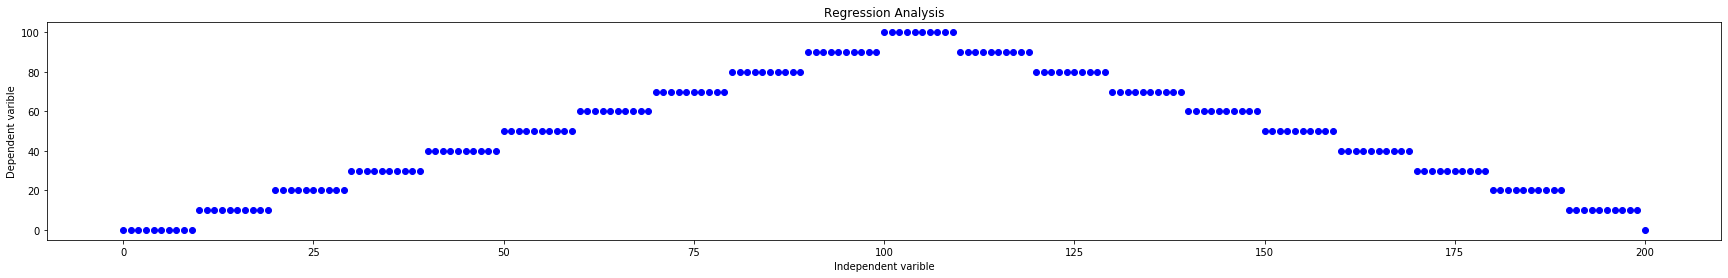

In [14]:
torch.manual_seed(1)    # reproducible

#x = torch.unsqueeze(torch.linspace(-10, 10, 100), dim=1)  # x data (tensor), shape=(100, 1)
#y = torch.cos(x) + 0.5*torch.rand(x.size())                # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

# view data
plt.figure(figsize=(30,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "blue")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

In [15]:
x.shape

torch.Size([201, 1])

In [16]:
y

tensor([[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [ 10.],
        [ 10.],
        [ 10.],
        [ 10.],
        [ 10.],
        [ 10.],
        [ 10.],
        [ 10.],
        [ 10.],
        [ 10.],
        [ 20.],
        [ 20.],
        [ 20.],
        [ 20.],
        [ 20.],
        [ 20.],
        [ 20.],
        [ 20.],
        [ 20.],
        [ 20.],
        [ 30.],
        [ 30.],
        [ 30.],
        [ 30.],
        [ 30.],
        [ 30.],
        [ 30.],
        [ 30.],
        [ 30.],
        [ 30.],
        [ 40.],
        [ 40.],
        [ 40.],
        [ 40.],
        [ 40.],
        [ 40.],
        [ 40.],
        [ 40.],
        [ 40.],
        [ 40.],
        [ 50.],
        [ 50.],
        [ 50.],
        [ 50.],
        [ 50.],
        [ 50.],
        [ 50.],
        [ 50.],
        [ 50.],
        [ 50.],
        [ 60.],
        [ 60.],
        

### Krok 2. Definiowanie sieci neuronowej
##### 2.1 Programowanie torch.nn.Module

In [17]:
N, D_in = x.shape
N, D_out = y.shape

H = 500                            ## the number of dimensions of the inner layer
#device = torch.device('cuda')

##### 2.2 Definicja krztałtu sieci
Ta sieć ma tylko jedną ukrytą warstwę, ale teraz ma 150 węzłów, a po nim następuje funkcja LeakyReLu.
Musi byc jedna zmienna wejściowa i jedna wartość wynikowa żeby były takie fajne wykresy dwówymiarowe

In [18]:
import torch.nn as nn

layers = []
layers.append(nn.Linear(D_in, H))   # INPUT Linear


layers.append(nn.LeakyReLU())    ## LeakyReLU
# normalizacja warstwy
#layers.append(nn.BatchNorm1d(H)),
# Apply dropout to prevent overfitting
#layers.append(nn.Dropout(0.9)),         


#layers.append(nn.LeakyReLU())    ## LeakyReLU
# normalizacja warstwy
#layers.append(nn.BatchNorm1d(H)),
# Apply dropout to prevent overfitting
#layers.append(nn.Dropout(0.5)), 


#layers.append(nn.Sigmoid())  ## Sigmoid
# normalizacja warstwy
#layers.append(nn.BatchNorm1d(H)),
# Apply dropout to prevent overfitting
#layers.append(nn.Dropout(0.4)), 


#layers.append(nn.ReLU(inplace=True))  ## ReLU
# normalizacja warstwy
#layers.append(nn.BatchNorm1d(H)),
# Apply dropout to prevent overfitting
#layers.append(nn.Dropout(0.4)), 


layers.append(nn.Linear(H, D_out))


net = nn.Sequential(*layers)

##### 2.2 Algorytm optymalizacji: 

##### Optymalizator SGD
lr: Szybkość uczenia się -> Szybkość, z jaką nasz model aktualizuje wagi w komórkach za każdym razem, gdy przeprowadzana jest wsteczna propagacja

In [19]:
#optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

##### Optymalizator ADAM 
zamiast użytego optymalizatora SGD, działa lepiej dla powykręcanego zbioru danych empirycznych. Należy przetestować różne rodzaje optymalizatorów.

In [20]:
#optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

##### Optymalizator ADAMMAX

In [21]:
#optimizer = torch.optim.Adamax(net.parameters(), lr=0.01)

##### Optymalizator ASGD

In [22]:
#optimizer = torch.optim.ASGD(net.parameters(), lr=0.01, lambd=0.0001, alpha=0.15, t0=000000.0)

In [23]:
#optimizer = torch.optim.LBFGS(net.parameters(), lr=0.01, max_iter=20, max_eval=None, tolerance_grad=1e-05, tolerance_change=1e-09, history_size=100, line_search_fn=None)

Bardzo dobre efekty daje optimizer RMSprop

In [24]:
#optimizer = torch.optim.RMSprop(net.parameters(), lr=0.01, alpha=0.99, eps=1e-08)

Doskonałę efekty daje optimizer RMSprop

In [25]:
#optimizer = torch.optim.Rprop(net.parameters(), lr=0.01, etas=(0.5, 1.2), step_sizes=(1e-06, 50))

In [26]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0, dampening=0, weight_decay=0, nesterov=False)

##### 2.2 Definicja funkcji straty
to jest R2 dla regresji

In [27]:
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

### Krok 3. Definiowanie procesu nauki i nauka

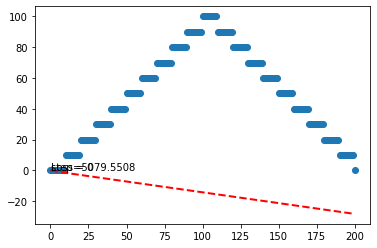

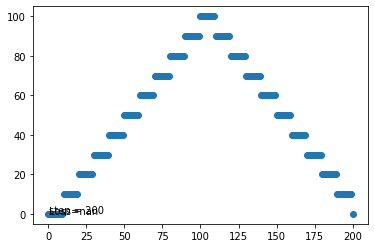

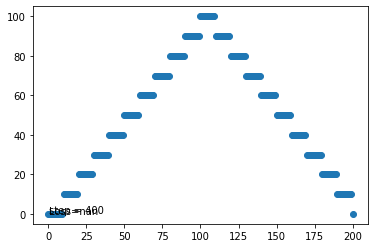

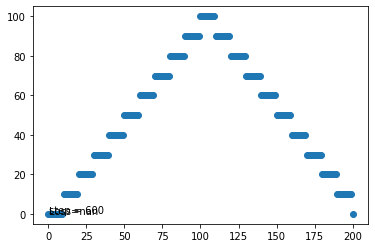

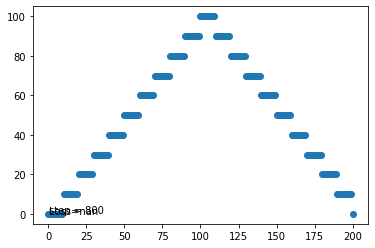

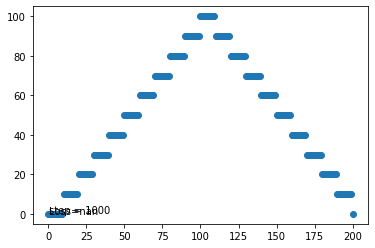

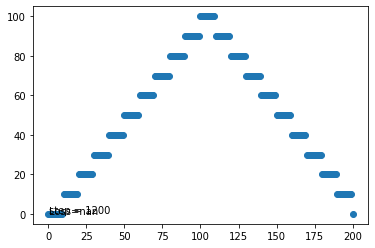

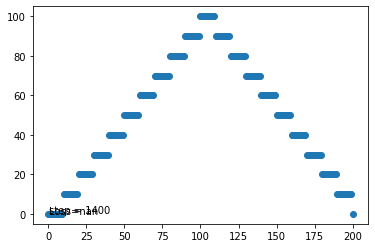

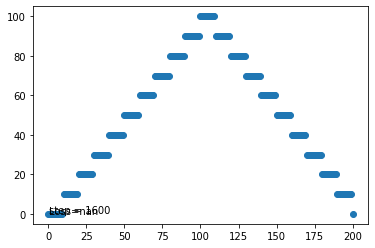

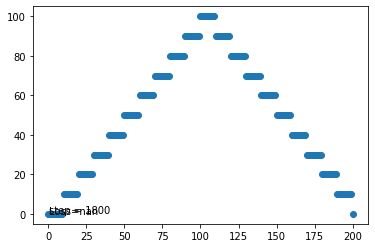

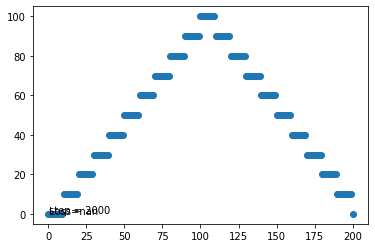

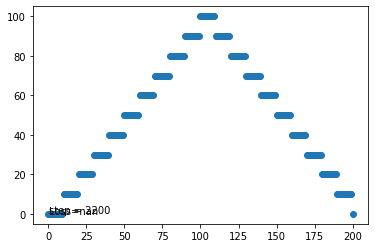

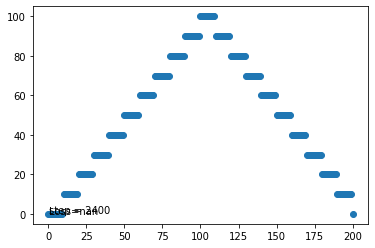

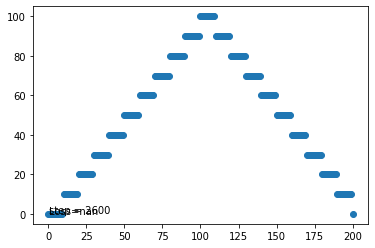

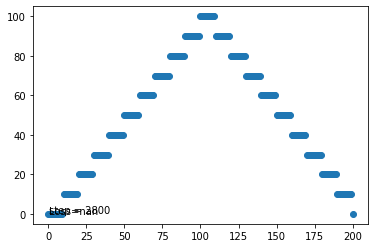

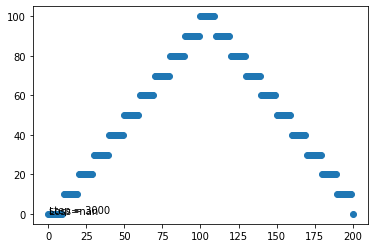

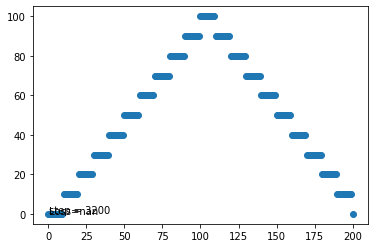

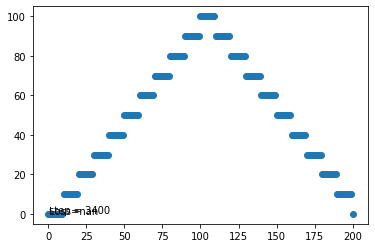

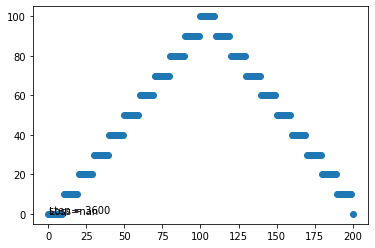

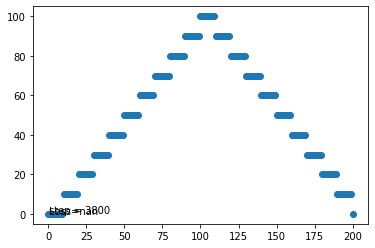

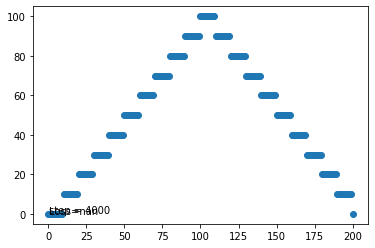

In [28]:
inputs = Variable(x)                          #1. deklarujemy x i y do nauki
outputs = Variable(y)
for i in range(4050):                          #2. pętla 1050 powtórzeń (epok)
   prediction = net(inputs)
   loss = loss_func(prediction, outputs) 
   optimizer.zero_grad()
   loss.backward()        
   optimizer.step()       

   if i % 200 == 0:                             #3. Pokazuje naukę co 100 kroków
       # plot and show learning process
       plt.cla()
       plt.scatter(x.data.numpy(), y.data.numpy())
       plt.plot(x.data.numpy(), prediction.data.numpy(), 'r--', lw=2)
       plt.text(0.65, 0.1, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'black'})
       plt.text(0.65, 0.3, 'step = %d' % i, fontdict={'size': 10, 'color':  'black'})
       plt.pause(0.1)

plt.show()